In [4]:
!pip install konlpy
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


# 형태소 토큰화하기

In [3]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
# 형태소 추출
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs('꿈의 거처')
print(token)

['꿈', '의', '거처']


In [5]:
# 품사 정보를 추가하여 추출
from konlpy.tag import Okt
okt=Okt()
sentence_tag=okt.pos('달이 참 예쁘다고')
print(sentence_tag)
sentence_tag=okt.pos('달이 참 예쁘다고', join=True)
print(sentence_tag)

[('달이', 'Noun'), ('참', 'Verb'), ('예쁘다고', 'Adjective')]
['달이/Noun', '참/Verb', '예쁘다고/Adjective']


In [6]:
from konlpy.tag import Okt
okt=Okt()
sentence=okt.phrases('달이 참 예쁘다고')
sentence

['달이']

# 형태소 분석

In [7]:
# pos()로 형태소 분석
from konlpy.tag import Okt
okt=Okt()
text=input()
sentece_tag=okt.pos(text)
print(sentece_tag)

저는 항상 누텔라 딸기 생크림 와플을 먹는데요!  ​  마로와플 생크림은 다른 와플집과 다르게  살짝 얼어 있어서 특별해요!
[('저', 'Noun'), ('는', 'Josa'), ('항상', 'Noun'), ('누텔라', 'Noun'), ('딸기', 'Noun'), ('생크림', 'Noun'), ('와플', 'Noun'), ('을', 'Josa'), ('먹는데요', 'Verb'), ('!', 'Punctuation'), ('\u200b', 'Foreign'), ('마로', 'Noun'), ('와플', 'Noun'), ('생크림', 'Noun'), ('은', 'Josa'), ('다른', 'Noun'), ('와플', 'Noun'), ('집', 'Noun'), ('과', 'Josa'), ('다르게', 'Adjective'), ('살짝', 'Noun'), ('얼어', 'Verb'), ('있어서', 'Adjective'), ('특별해요', 'Adjective'), ('!', 'Punctuation')]


In [8]:
# collextion.counter()로 빈도수 구하기
import collections

text = '저는 항상 누텔라 딸기 생크림 와플을 먹는데요! 마로와플 생크림은 다른 와플집과 다르게  살짝 얼어 있어서 특별해요!'
sentence_tag = okt.pos(text)

adj_list = []

for word, tag in sentence_tag:
    if tag in ['Noun', 'Adjective']:
        adj_list.append(word)
counts = collections.Counter(adj_list)
tag=counts.most_common(10)
print(tag)

[('와플', 3), ('생크림', 2), ('저', 1), ('항상', 1), ('누텔라', 1), ('딸기', 1), ('마로', 1), ('다른', 1), ('집', 1), ('다르게', 1)]


# 워드 클라우드

In [15]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------------------------------------- - 286.7/300.2 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00


In [26]:
# 텍스트 가져와서 품사 태깅
text=input()
sentence_tag=okt.pos(text)
adj_list=[]
for word,tag in sentece_tag:
  if tag in ['Noun','Adjective']:
    adj_list.append(word)

저는 항상 누텔라 딸기 생크림 와플을 먹는데요! 마로와플 생크림은 다른 와플집과 다르게  살짝 얼어 있어서 특별해요!


In [28]:
counts=collections.Counter(adj_list)
tag=counts.most_common(10)
tag

[('와플', 3),
 ('생크림', 2),
 ('저', 1),
 ('항상', 1),
 ('누텔라', 1),
 ('딸기', 1),
 ('마로', 1),
 ('다른', 1),
 ('집', 1),
 ('다르게', 1)]

In [34]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/malgun.ttf"

wc = WordCloud(font_path=font_path, background_color='white',max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

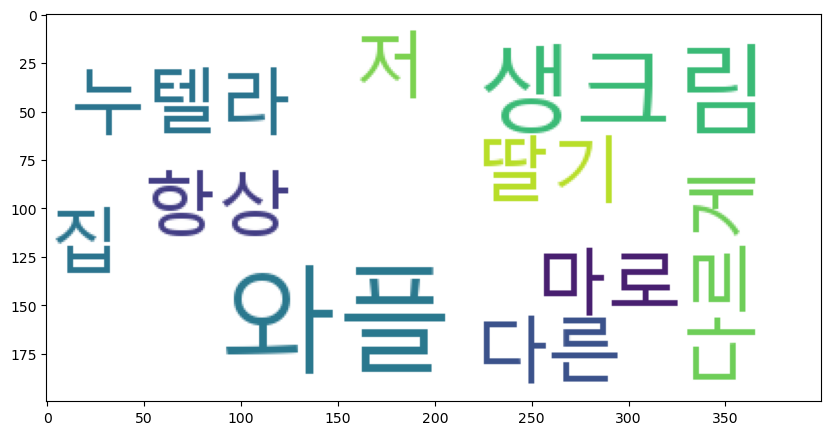

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cloud)

# 영화 리뷰 자연어처리 (1)

In [38]:
#데이터 로드하기(id, document, label 총 3개의 열로 구성된 50,000개의 리뷰)

import pandas as pd
df = pd.read_table("C:/Users/user/데이터 분석을 위한 전처리와 시각화/12장/ratings_train.txt")
df.head(4)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0


In [39]:
#데이터 전처리: 중복과 결측치 제거

print(df['id'].nunique()) # df의 'id' 열에서 고유한(unique) 값의 개수를 세어 출력
print(df.isnull().sum())
#중복 id는 없지만 리뷰에 널값이 5개

150000
id          0
document    5
label       0
dtype: int64


In [40]:
#중복 제거 및 결측치 확인

df = df.dropna(how='any') #Null 값이 존재하는 행 제거
print(df.isnull().values.any()) #Null 값이 존재하는지 확인

False


In [42]:
#불용어 제거

df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백을 제외하고 모두 제거
df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11172\4272451342.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [43]:
#형태소로 토큰화하기

temp_list=[]

for sentence in df['document']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('영화', 50643),
 ('정말', 9578),
 ('진짜', 8338),
 ('점', 7636),
 ('이', 7476),
 ('연기', 6328),
 ('평점', 6315),
 ('것', 6302),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('왜', 5124),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('말', 4552),
 ('더', 4355),
 ('배우', 4291),
 ('때', 4279),
 ('내', 4133),
 ('감독', 4118),
 ('거', 4085),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('뭐', 3775),
 ('그냥', 3758),
 ('좀', 3648),
 ('그', 3587),
 ('이런', 3574),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('수', 3240),
 ('작품', 2980),
 ('사랑', 2943),
 ('나', 2898),
 ('없다', 2834),
 ('하나', 2818),
 ('다시', 2816),
 ('볼', 2785),
 ('마지막', 2757),
 ('좋은', 2663),
 ('이건', 2605),
 ('정도', 2586),
 ('같은', 2554),
 ('완전', 2540),
 ('입니다', 2532),
 ('있는', 2510),
 ('처음', 2453)]

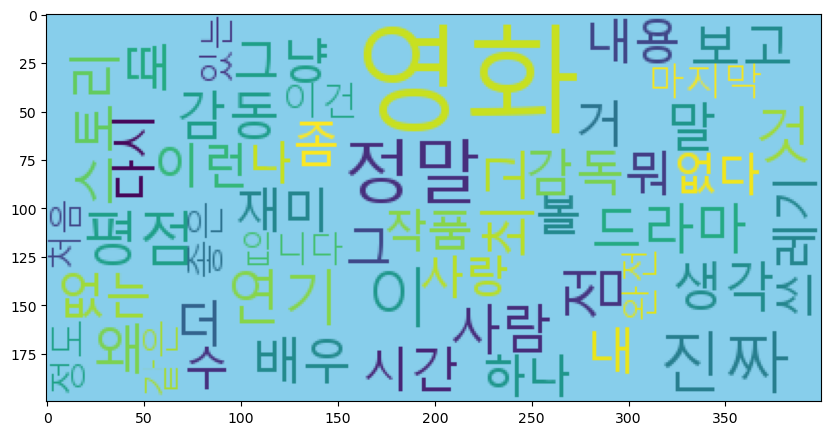

In [44]:
#워드 클라우드 생성과 시각화

from wordcloud import WordCloud
wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

In [45]:
# 상관 없는 단어 삭제하기

temp_list=[]
stopword=['점','정말','왜','말','그','없다','정도','걸','뭐','이건','영화','완전','좀','있는','거','나','이','볼','입니다','것','이런','더','수','때']

for sentence in df['document']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if word not in stopword:
    if tag in ['Noun','Adjective']:
      temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('진짜', 8338),
 ('연기', 6328),
 ('평점', 6315),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('배우', 4291),
 ('내', 4133),
 ('감독', 4118),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('그냥', 3758),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('작품', 2980),
 ('사랑', 2943),
 ('하나', 2818),
 ('다시', 2816),
 ('마지막', 2757),
 ('좋은', 2663),
 ('같은', 2554),
 ('처음', 2453),
 ('장면', 2425),
 ('액션', 2397),
 ('주인공', 2376),
 ('최악', 2275),
 ('돈', 2196),
 ('이야기', 2174),
 ('지금', 2173),
 ('별로', 2132),
 ('느낌', 2093),
 ('임', 2090),
 ('연출', 2076),
 ('없고', 2059),
 ('명작', 2041),
 ('듯', 2040),
 ('끝', 2039),
 ('역시', 1994),
 ('년', 1991),
 ('개', 1944),
 ('재밌게', 1913),
 ('이해', 1898),
 ('안', 1843),
 ('이영화', 1816),
 ('또', 1781)]

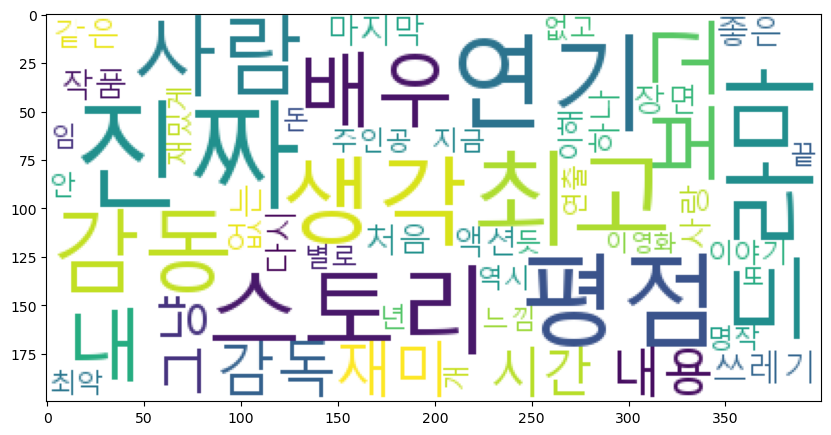

In [46]:
#워드 클라우드 시각화

wc=WordCloud(font_path=font_path,background_color='white', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.imshow(cloud)

# 영화 리뷰 자연어처리 (2)

In [48]:
dict_df = pd.read_csv("C:/Users/user/데이터 분석을 위한 전처리와 시각화/12장/comment_rank.csv")
dict_df.head(3)

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10


In [49]:
dict_df.info() 
#990개의 리뷰, 3개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [50]:
#영화 개수 확인
dict_df['movie'].unique()

array(['언포기버블', '인질', '롱 리브 더 킹: 목포 영웅', '싱크홀', '아수라', '고양이 집사', '비바리움',
       '어메이징 스파이더맨', '미드소마', '서복', '매트릭스'], dtype=object)

In [58]:
#영화별 평점
dict_df.groupby('movie')['rank'].mean()

movie
고양이 집사              8.678947
롱 리브 더 킹: 목포 영웅    10.000000
매트릭스               10.000000
미드소마                9.285714
비바리움                9.095238
서복                  9.319149
싱크홀                 9.838384
아수라                 9.616162
어메이징 스파이더맨          9.711538
언포기버블               7.535354
인질                  9.534884
Name: rank, dtype: float64

In [61]:
#영화별 리뷰 수
dict_df.groupby('movie')['comment'].count()

movie
고양이 집사             190
롱 리브 더 킹: 목포 영웅      0
매트릭스                 8
미드소마                84
비바리움                84
서복                  47
싱크홀                 99
아수라                 99
어메이징 스파이더맨          52
언포기버블               99
인질                 129
Name: comment, dtype: int64

In [62]:
#'고양이 집사' 데이터만 추출하기

cat_df=dict_df[dict_df.movie=='고양이 집사']
cat_df

,Unnamed: 0,movie,comment,rank
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
6,6,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
15,15,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
16,16,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
25,25,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
949,949,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
959,959,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
969,969,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
979,979,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9


In [66]:
#단어별 빈도수 구하기

temp_list=[]
for sentence in cat_df['comment']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('아이', 198),
 ('감동', 190),
 ('사람', 190),
 ('방금', 99),
 ('깊게', 99),
 ('우리나라', 99),
 ('독일', 99),
 ('동물보호법', 99),
 ('강화', 99),
 ('더', 99),
 ('이상', 99),
 ('없기를', 99),
 ('길위', 99),
 ('모두', 99),
 ('손길', 99),
 ('행복하기를', 99),
 ('영화', 99),
 ('세상', 99),
 ('듯', 99),
 ('좋', 99),
 ('은', 99),
 ('계시다면', 99),
 ('얼마나', 99),
 ('좋을까요', 99),
 ('출연', 99),
 ('냥', 99),
 ('모든', 99),
 ('복', 99),
 ('행복하세요', 99),
 ('덕분', 99),
 ('마음', 99),
 ('사랑스런', 91),
 ('고양이', 91),
 ('따뜻한', 91),
 ('이야기', 91),
 ('만', 91)]

In [71]:
#dict() 대신 반복문을 사용해 딕셔너리로 변환

tag_dic={}

for k,v in tag:
  tag_dic[k]=v

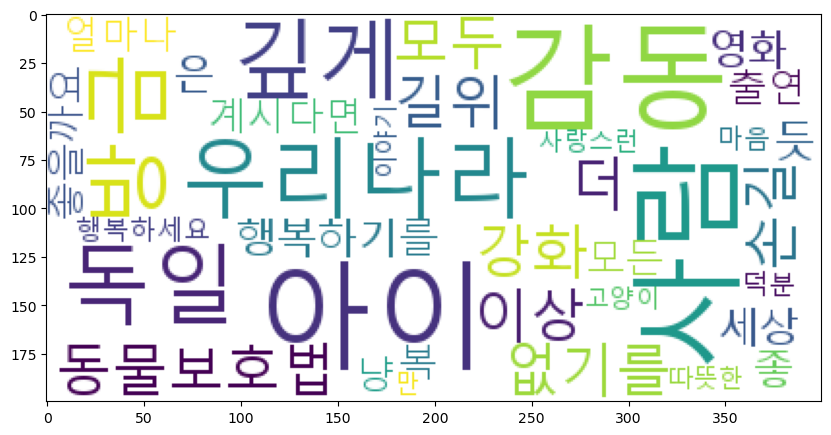

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(font_path=font_path, background_color='white',max_font_size=60)
cloud=wc.generate_from_frequencies(tag)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)